<a href="https://colab.research.google.com/github/Akshaya345/AIML_Tutorial/blob/main/AIML_Module5_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

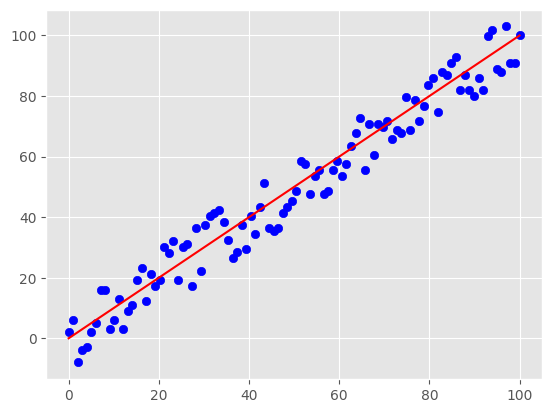

In [2]:
# initializing random data

np.random.seed(0)
x = np.linspace(0,100,100)
y_actual = np.copy(x)
y_pred = x + np.random.randint(-10,10,100)

plt.plot(x,y_actual,color="red")
plt.scatter(x,y_pred,color="blue")
plt.show()

In [3]:
mse = np.mean((y_actual-y_pred)**2)
print("MSE is: {}".format(mse))
print("RMSE is: {}".format(np.sqrt(mse)))

MSE is: 38.68
RMSE is: 6.219324722186485


In [4]:
mae = np.mean(np.abs(y_actual-y_pred))
print("MAE is: {}".format(mae))

MAE is: 5.5


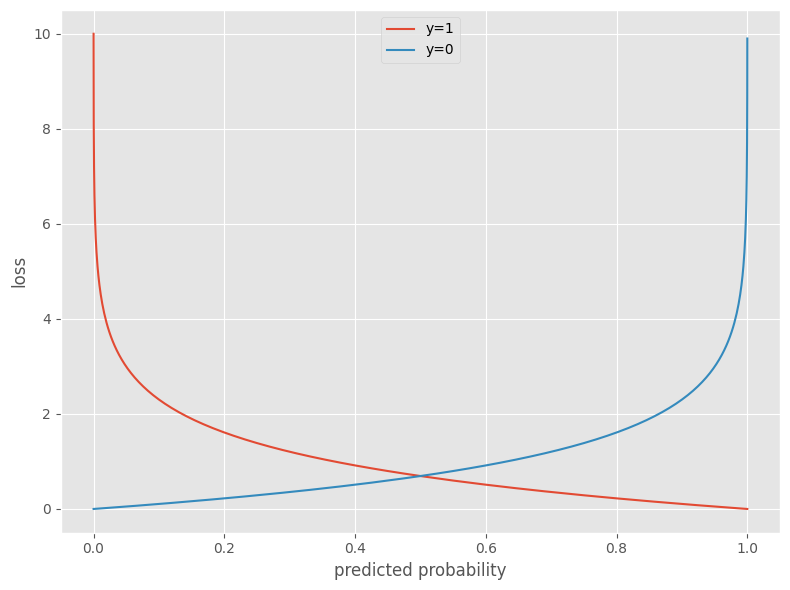

In [5]:
def sigmoid(z):
  return 1/(1 + np.exp(-z))

def cross_entropy_loss(y_,y):
  if y==1:
    return -np.log(y_)

  return -np.log(1-y_)

z = np.arange(-10, 10, 0.1)
h_z = sigmoid(z)

cost_1 = cross_entropy_loss(h_z, 1)
cost_0 = cross_entropy_loss(h_z, 0)

fig, ax = plt.subplots(figsize=(8,6))
plt.plot(h_z, cost_1, label='y=1')
plt.plot(h_z, cost_0, label='y=0')
plt.xlabel('predicted probability')
plt.ylabel('loss')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [6]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [7]:
train_path = "https://raw.githubusercontent.com/PranavTadimeti/Regression-lab2/main/BigMart-train.csv"
train = pd.read_csv(train_path)

In [8]:
# Preprocess Data

def preprocess(df):
  mean_weight = df['Item_Weight'].mean()
  df['Item_Weight'].fillna(mean_weight,inplace=True)

  mode_size = df['Outlet_Size'].mode()
  df['Outlet_Size'].fillna(mode_size,inplace=True)

  df.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

  return pd.get_dummies(df)

train = preprocess(train)

train.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [9]:
train , test = train_test_split(train, test_size = 0.3)

x_train = train.drop('Item_Outlet_Sales', axis=1)
y_train = train['Item_Outlet_Sales']

x_test = test.drop('Item_Outlet_Sales', axis = 1)
y_test = test['Item_Outlet_Sales']

In [10]:
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

In [11]:
def knn_regression(k,x_train,y_train,x_test,y_test):
    model = neighbors.KNeighborsRegressor(n_neighbors = k)

    model.fit(x_train, y_train)
    pred=model.predict(x_test)
    error = sqrt(mean_squared_error(y_test,pred))
    rmse_val.append(error)

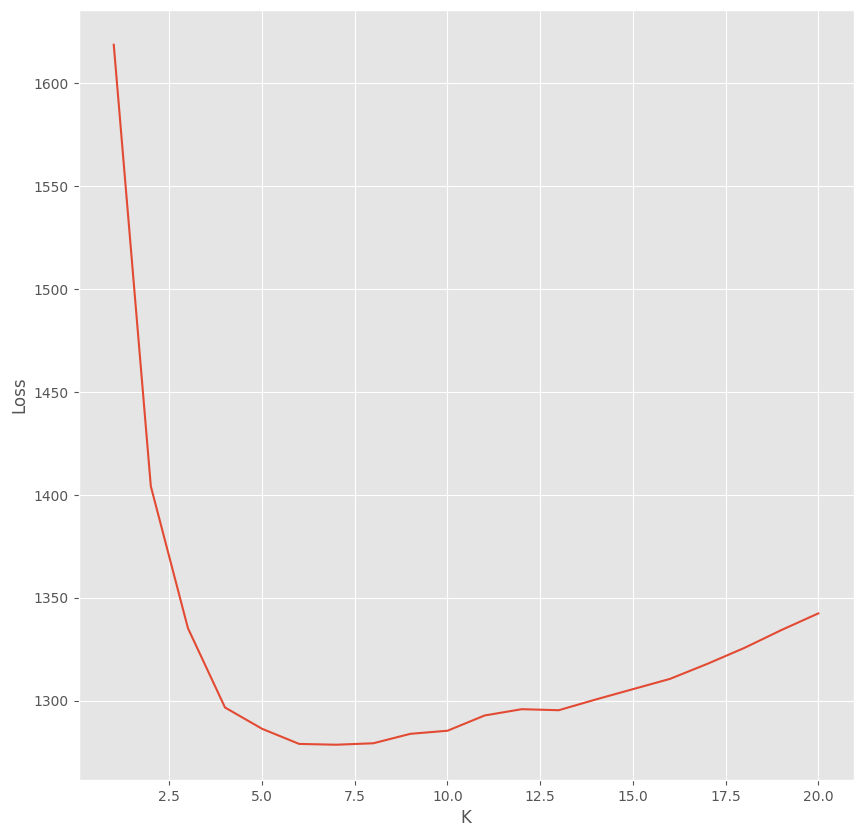

Minimum error 1278.5816281094171 is at k = 6


In [12]:
rmse_val = []

for k in range(1,21):
  knn_regression(k,x_train,y_train,x_test,y_test)

figure = plt.figure(figsize=(10,10))
plt.plot(np.arange(1,21),rmse_val)
plt.xlabel("K")
plt.ylabel("Loss")
plt.show()

rmse_val = np.asarray(rmse_val)
print("Minimum error {} is at k = {}".format(np.min(rmse_val),np.argmin(rmse_val)))

Mean Squared Error(MSE): 0.441992411801653
Mean Absolute Error(MAE): 0.5483735302198436
Huber Loss: 0.21728563684252297


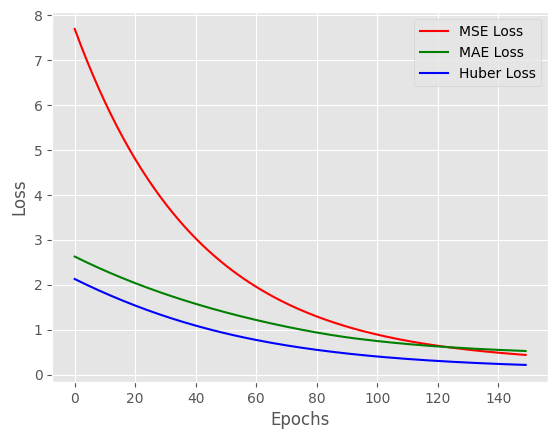

In [27]:
#1. Try out these loss functions on regression tasks, and try to understand the model performance based on the loss function.
import numpy as np
import matplotlib.pyplot as plt

# Function to initialize weights and bias
def initialize_parameters():
    weights = np.random.randn(1, 1) * 0.5
    bias = np.random.randn(1) * 0.5
    return weights, bias

# Function to perform linear regression
def linear_regression(X, weights, bias):
    return np.dot(X, weights) + bias

# Loss functions
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def huber_loss(y_true, y_pred, delta=1.0):
    diff = np.abs(y_true - y_pred)
    quadratic_loss = 0.5 * (diff**2)
    linear_loss = delta * (diff - 0.5 * delta)
    return np.mean(np.where(diff < delta, quadratic_loss, linear_loss))

# Function to update parameters using gradient descent
def update_parameters(X, y, weights, bias, learning_rate):
    y_pred = linear_regression(X, weights, bias)
    gradient_weights = -2 * np.mean(X * (y - y_pred))
    gradient_bias = -2 * np.mean(y - y_pred)

    weights -= learning_rate * gradient_weights
    bias -= learning_rate * gradient_bias

    return weights, bias

# Function to train the model
def train_model(X_train, y_train, learning_rate, epochs):
    weights, bias = initialize_parameters()

    mse_history = []
    mae_history = []
    huber_history = []

    for epoch in range(epochs):
        # Update parameters using gradient descent
        weights, bias = update_parameters(X_train, y_train, weights, bias, learning_rate)

        # Calculate loss for each epoch
        y_pred = linear_regression(X_train, weights, bias)
        mse_loss = mean_squared_error(y_train, y_pred)
        mae_loss = mean_absolute_error(y_train, y_pred)
        huber_loss_value = huber_loss(y_train, y_pred)

        mse_history.append(mse_loss)
        mae_history.append(mae_loss)
        huber_history.append(huber_loss_value)

    return weights, bias, mse_history, mae_history, huber_history

# Function to evaluate the model on the test set
def evaluate_model(X_test, y_test, weights, bias):
    y_test_pred = linear_regression(X_test, weights, bias)
    mse_test = mean_squared_error(y_test, y_test_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    huber_test = huber_loss(y_test, y_test_pred)

    return mse_test, mae_test, huber_test

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 1)
y = 3 * X + 2 + 0.1 * np.random.randn(100, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = X[:80], X[80:], y[:80], y[80:]

# Set hyperparameters with different values
learning_rate = 0.005
epochs = 150

# Train the model
weights, bias, mse_history, mae_history, huber_history = train_model(X_train, y_train, learning_rate, epochs)

# Evaluate the model on the test set
mse_test, mae_test, huber_test = evaluate_model(X_test, y_test, weights, bias)

# Print evaluation results
print(f'Mean Squared Error(MSE): {mse_test}')
print(f'Mean Absolute Error(MAE): {mae_test}')
print(f'Huber Loss: {huber_test}')

# Plot training history
plt.plot(mse_history, label='MSE Loss', color='red')
plt.plot(mae_history, label='MAE Loss', color='green')
plt.plot(huber_history, label='Huber Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



#2. Explore other loss functions and try to understand when and why they are used.

**Mean Squared Error (MSE):**

Use case: Regression problems.

Why: Penalizes larger errors more heavily.

**Binary Cross-Entropy (Log Loss):**

Use case: Binary classification problems.

Why: Effective for tasks where the output is binary; penalizes confidently wrong predictions.

**Categorical Cross-Entropy:**

Use case: Multi-class classification problems.

Why: Extends binary cross-entropy for multiple classes; penalizes models for assigning low probability to the correct class.

**Dice Loss:**

Use case: Image segmentation tasks.

Why: Measures the overlap between predicted and true segmentation masks; commonly used in medical image segmentation.

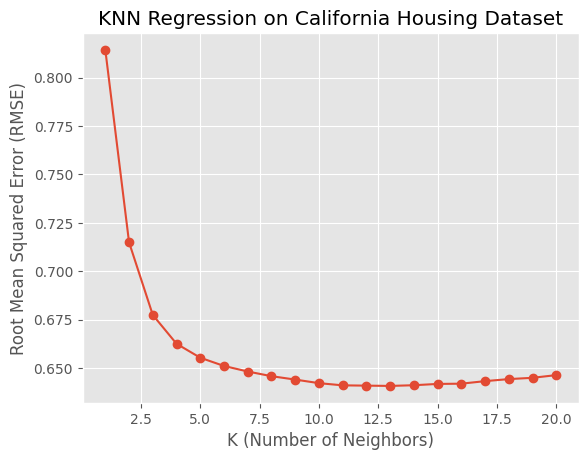

Optimal K: 13
Minimum RMSE: 0.6407969329875416


In [28]:
#3. Try out KNN-regression on other datasets see which values of K give the best results.
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Load the California housing dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function to perform KNN regression and return the RMSE
def knn_regression(k, X_train, y_train, X_test, y_test):
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    return rmse

# Experiment with different values of K
k_values = list(range(1, 21))
rmse_values = []

for k in k_values:
    rmse = knn_regression(k, X_train_scaled, y_train, X_test_scaled, y_test)
    rmse_values.append(rmse)

# Plot the results
plt.plot(k_values, rmse_values, marker='o')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('KNN Regression on California Housing Dataset')
plt.show()

# Find the optimal K with the minimum RMSE
optimal_k = k_values[np.argmin(rmse_values)]
min_rmse = np.min(rmse_values)

print(f"Optimal K: {optimal_k}")
print(f"Minimum RMSE: {min_rmse}")